In [165]:
import pandas as pd

In [166]:
df=pd.read_csv('All Earthquakes.csv')

In [167]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [168]:
pd.options.display.max_rows

60

In [169]:
pd.options.display.max_columns=None

In [170]:
df[1:4]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
1,2017-01-30T23:32:12.810Z,33.620500,-116.633333,12.52,0.78,ml,19.0,80.0,0.03829,0.30,ci,ci37575887,2017-01-30T23:35:54.456Z,"8km NNE of Anza, CA",earthquake,0.98,1.67,0.366,14.0,automatic,ci,ci
2,2017-01-30T23:13:32.520Z,38.791832,-122.825500,-0.83,1.19,md,6.0,179.0,0.04734,0.10,nc,nc72758025,2017-01-30T23:15:14.174Z,"6km WNW of The Geysers, California",earthquake,1.47,3.78,0.190,2.0,automatic,nc,nc
3,2017-01-30T23:07:07.350Z,33.792333,-116.158333,5.40,1.79,ml,51.0,63.0,0.05281,0.19,ci,ci37575839,2017-01-30T23:17:49.970Z,"10km NNE of Indio, CA",earthquake,0.24,0.54,0.190,27.0,automatic,ci,ci


In [171]:
df['time']=pd.to_datetime(df['time'])

In [172]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-01-30 23:41:27.870,38.814667,-122.794167,2.77,1.00,md,15.0,68.0,0.006748,0.01,nc,nc72758065,2017-01-30T23:43:07.082Z,"5km NW of The Geysers, California",earthquake,0.30,0.56,0.020,5.0,automatic,nc,nc
1,2017-01-30 23:32:12.810,33.620500,-116.633333,12.52,0.78,ml,19.0,80.0,0.038290,0.30,ci,ci37575887,2017-01-30T23:35:54.456Z,"8km NNE of Anza, CA",earthquake,0.98,1.67,0.366,14.0,automatic,ci,ci
2,2017-01-30 23:13:32.520,38.791832,-122.825500,-0.83,1.19,md,6.0,179.0,0.047340,0.10,nc,nc72758025,2017-01-30T23:15:14.174Z,"6km WNW of The Geysers, California",earthquake,1.47,3.78,0.190,2.0,automatic,nc,nc
3,2017-01-30 23:07:07.350,33.792333,-116.158333,5.40,1.79,ml,51.0,63.0,0.052810,0.19,ci,ci37575839,2017-01-30T23:17:49.970Z,"10km NNE of Indio, CA",earthquake,0.24,0.54,0.190,27.0,automatic,ci,ci
4,2017-01-30 23:02:30.680,33.791167,-116.152667,5.97,2.62,ml,68.0,63.0,0.057610,0.17,ci,ci37575823,2017-01-30T23:29:08.980Z,"10km NE of Indio, CA",earthquake,0.20,0.70,0.228,25.0,automatic,ci,ci


In [173]:
df['Year_month']=df['time'].apply(lambda x: x.strftime('%b-%y')) 

In [174]:
data1=df.groupby('type').count()

In [175]:
data1=data1.reset_index()

In [176]:
data1[:1]

,type,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Year_month
0,earthquake,8323,8323,8323,8323,8323,8323,5139,5785,5776,8317,8323,8323,8323,8323,4118,8317,5636,5747,8323,8323,8323,8323


In [177]:
data1=data1[['type','time']]

In [178]:
data1.columns

Index(['type', 'time'], dtype='object')

### rename the colum

In [179]:
data1.columns.values[1]='count'

In [180]:
data1

,type,count
0,earthquake,8323
1,explosion,58
2,ice quake,40
3,other event,4
4,quarry blast,51


In [181]:
%matplotlib inline 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x09109B90>], dtype=object)

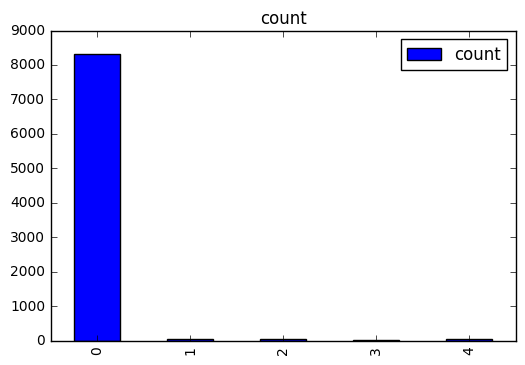

In [182]:
data1.plot(kind='bar',subplots=True,)

# Plotting using Plotly API

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go
#Setting plotly credentials
#mantejsingh account
py.sign_in('mantejsingh','hQnYIQxkVFVW')


In [31]:
data = [go.Scatter(
        x=data1['type'],
        y=data1['count'],
        #mode = 'markers',
        name = 'lines+markers'
        #line = dict(
        #color = ('Black'),
        #width = 6
        #dash = 'spline'
        
           
    )
       
       ]
layout = go.Layout(
title='<b>Number Of Calamities</b>',
xaxis=dict(title='Type',color = ('Black')),
yaxis=dict(title='Counts',color = ('Black'))
#fillcolor='rgba(0,100,80,0.2)'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Earthquakes')

In [49]:
#mags = [2 ** (df['mag']) ]
#mags

In [113]:
'''scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]'''
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]

In [184]:
df['text'] = 'Type: '+df['type']  + '<br>' +\
 'Place: '+df['place']

In [185]:
types = data1['type'].tolist()
len(types)

5

### TEST 1

In [186]:
'''data = [ dict(
        type = 'scattergeo',
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        colorscale = scl,
        autocolorscale = False,
        #mode = 'markers',
        name = 'Earthquacks',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
              
        )]

layout = dict(
        title = 'Most Earthquacks <br>(Hover for  names)',
        colorbar = True,
        showlegend = True,
        geo = dict(
        showframe = False,
        showcoastlines = True,
        showcountries = True,
        showland = True,
        
        ),
    )

fig = dict( data=data, layout=layout )
url = py.plot( fig, validate=False, filename='Eqack 2', fileopt='overwrite' )'''

'data = [ dict(\n        type = \'scattergeo\',\n        lon = df[\'longitude\'],\n        lat = df[\'latitude\'],\n        text = df[\'text\'],\n        colorscale = scl,\n        autocolorscale = False,\n        #mode = \'markers\',\n        name = \'Earthquacks\',\n        marker = dict(\n            line = dict (\n                color = \'rgb(255,255,255)\',\n                width = 2\n            ) ),\n        colorbar = dict(\n            title = "Millions USD")\n              \n        )]\n\nlayout = dict(\n        title = \'Most Earthquacks <br>(Hover for  names)\',\n        colorbar = True,\n        showlegend = True,\n        geo = dict(\n        showframe = False,\n        showcoastlines = True,\n        showcountries = True,\n        showland = True,\n        \n        ),\n    )\n\nfig = dict( data=data, layout=layout )\nurl = py.plot( fig, validate=False, filename=\'Eqack 2\', fileopt=\'overwrite\' )'

In [41]:
%matplotlib inline

In [6]:
import mpl_toolkits

#### i was trying with mpl Basemap but could not import the package, then i tried with plotly

In [3]:
import importlib
importlib.import_module('mpl_toolkits').__path__

['c:\\python35\\lib\\site-packages\\mpl_toolkits']

In [8]:
#from mpl_toolkits.basemap import Basemap

### TEST 2:

## finding the latitudes  and longitudes by type

In [187]:
for i in range(len(types)):
    #lim = types[i]
    df_sub = df.loc[df.type==types[i],:]
    print(len(df_sub))

8323
58
40
4
51


In [188]:
cases = []
for i in range(len(types)):
    lim = types[i]
    df_sub = df.loc[df.type==types[i],:]
    cases.append(go.Scattergeo(
        lon = df_sub['longitude'],
        lat = df_sub['latitude'],
        text = df_sub['text'],
        #colorscale = scl,
        #autocolorscale = False,
        name = types[i] + ' : '+str(len((df_sub))),
        marker = dict(
            line = dict (color = colors[i],width = 0.5),
            #sizemode = 'area',
            size = types[i]
            #size = len(df_sub)/8324
            ),
              
        
    ) )
    
layout = dict(
        title = '<b>Most Calamities</b>  <br>(Hover for details)',
        colorbar = True,
        showlegend = True,
        geo = dict(
        showframe = False,
        showcoastlines = True,
        showcountries = True,
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
        
        ),
    )

fig = dict( data=cases, layout=layout )
url = py.plot( fig, validate=False, filename='Eqack 1', fileopt='overwrite' )

In [147]:
#ex=df.loc[df.type==types[1],:]

In [148]:
#len(ex)

# It took me 8 hrs of hardwork to make this!!!